# Python para Métodos Numéricos

### Prof. Pedro Peixoto <ppeixoto@usp.br>

Mar 2022

Referências Principais:

[1] https://hal.inria.fr/inria-00564007/en

[2] https://scipy-lectures.org/advanced/optimizing/index.html#optimization-workflow

[3] https://scipy-lectures.org/advanced/advanced_numpy/index.html#cache-effects

In [1]:
import numpy as np
import time

## Exemplo 1 - Por que devo me preocupar com a forma de escrever o código em Python?

Série harmônica alternante - aproxima ln(2)

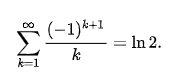

In [2]:
n = 40000000

In [10]:
# O caso ingênuo - série harmônica alternante - aproxima ln(2)

start_time = time.time()
sum = 0.0
for k in range(1,n):
    sum += ((-1)**(k+1))/(k)
tempo1 = time.time() - start_time

print("Soma:", sum, " Valor exato:", np.log(2.0), "Erro:", sum - np.log(2.0))
print("--- %s seconds ---" % tempo1)


Soma: 0.6931471930601587  Valor exato: 0.6931471805599453 Erro: 1.2500213419919248e-08
--- 10.833526611328125 seconds ---


In [6]:
# Vamos melhorar isso?
start_time = time.time()
a = np.arange(1,n)
b = - np.where(a%2, -a, a)
c = 1/ b
sum = np.sum(c)
tempo2 = time.time() - start_time

print("Soma:", sum, " Valor exato:", np.log(2.0), "Erro:", sum - np.log(2.0))
print("--- %s seconds ---" % tempo2)


Soma: 0.6931471930599442  Valor exato: 0.6931471805599453 Erro: 1.249999892483089e-08
--- 0.6524612903594971 seconds ---


In [8]:
ganho = tempo1/ tempo2 
print("Ganho de tempo: ", ganho, " vezes mais rápido")

Ganho de tempo:  16.555368098103465  vezes mais rápido


_Este exemplo é para deixar claro que implementações ingênuas em Python podem gerar tempos de processamentos absurdos! Evite "loops" em python em ranges ganres (vetores e matrizes) -> use numpy e arimética vetorial!_

**Qual é o "pulo do gato"?**

- As operações no primeiro caso são **interpretadas** a cada iteração
- As operações no segundo caso executam códigos pré **compilados** de C 

 As funções "arange", "where", "/", "sum" são implementadas em C e pré-compiladas. Ao pré-compilar essas funções, os executáveis resultantes tem rotinas otimizadas (máquina-dependente) para cálculos de operações vetoriais.


## Exemplo 2 - Tá bom, fiquei preocupado, mas e agora?

Vamos ver algumas ideias simples com numpy:

#### - Operações _in place_ são uma boa ideia

In [9]:
a = np.zeros(n)
%time a = 0.0*a
%time a *= 0.0

CPU times: user 19.9 ms, sys: 48 ms, total: 67.9 ms
Wall time: 67.4 ms
CPU times: user 33.6 ms, sys: 83 µs, total: 33.7 ms
Wall time: 33.9 ms


#### - Use sempre operações vetoriais (em numpy, essas operações são implementadas em C)

In [12]:
n= 10000000

# Loop explícito
start_time = time.time()
a = np.arange(1,n)
b = np.zeros_like(a)
for i in range(len(a)):
    b[i] = 3*a[i]
tempo = time.time() - start_time
print("Loop explícito    : %s seconds" % tempo)


Loop explícito    : 2.0728042125701904 seconds


In [13]:

# Loop implicito
start_time = time.time()
a = np.arange(1,n)
b =  [3*x for x in a]
tempo = time.time() - start_time
print("Loop implicito    : %s seconds" % tempo)


Loop implicito    : 1.1198413372039795 seconds


In [14]:

# Vetorização
start_time = time.time()
a = np.arange(1,n)
b =  3*a
tempo = time.time() - start_time
print("Usando vetorização: %s seconds" % tempo)


Usando vetorização: 0.1115121841430664 seconds


#### - Cuidado com o uso de memória também!

In [15]:
#Matrizes - a forma ingênua
n = 100
R = np.empty((2*n,2*n,2*n))
start_time = time.time()
for i in range(-n, n):
    for j in range(-n, n):
        for k in range(-n, n):
            R[i+n, j+n, k+n] = np.sqrt(i*i + j*j + k*k)
tempo = time.time() - start_time
print("Com loops              : %s seconds " % tempo, " Memória auxiliar: ", 0.0, "MB")


Com loops              : 7.093303203582764 seconds   Memória auxiliar:  0.0 MB


In [18]:

#Alternativas - vetorização!
n = 100
#Usando mais memória
start_time = time.time()
#constroi cubos completos com valores de i, j, k
i, j, k = np.mgrid[-n:n, -n:n, -n:n]
R1 = np.sqrt(i**2 + j**2 + k**2)
tempo = time.time() - start_time
print("Com grids auxiliares   : %s seconds " % tempo, " Memória auxiliar: ", 3*i.nbytes/1024/1024, "MB")


#Ver se bateu
print(" Check:", np.max(np.max(np.max(np.abs(R1-R)))))

Com grids auxiliares   : 0.17676615715026855 seconds   Memória auxiliar:  183.10546875 MB
 Check: 0.0


In [19]:
#Usando menos memória
start_time = time.time()
#constroi vetores com valores de i, j, k
# Construct the row vector: from -100 to +100
i = np.arange(-n, n).reshape(2*n, 1, 1)
# Construct the column vector
j = np.reshape(i, (1, 2*n, 1))
# Construct the depth vector
k = np.reshape(i, (1, 1, 2*n))
#Alternativa para criar os 3 vetores de uma vez
#i, j, k = np.ogrid[-n:n, -n:n, -n:n]
R2 = np.sqrt(i**2 + j**2 + k**2)
tempo = time.time() - start_time
print("Com vetores auxiliares : %s seconds " % tempo, " Memória auxiliar: ", 3*i.nbytes/1024/1024, "MB")
print()

#Ver se bateu
print(" Check:", np.max(np.max(np.max(np.abs(R1-R)))), np.max(np.max(np.max(np.abs(R2-R)))), np.max(np.max(np.max(np.abs(R1-R2)))))

Com vetores auxiliares : 0.03226518630981445 seconds   Memória auxiliar:  0.00457763671875 MB

 Check: 0.0 0.0 0.0


_A diferença de processamento e memória pode ser muito grande!_

## Exemplo 3 - Fiquei curioso, agora quero entender melhor.

    Vamos falar de cache e stride?

**Cache**

Memória volátil (guarda coisas temporárias) de acesso rápido ao processador. 

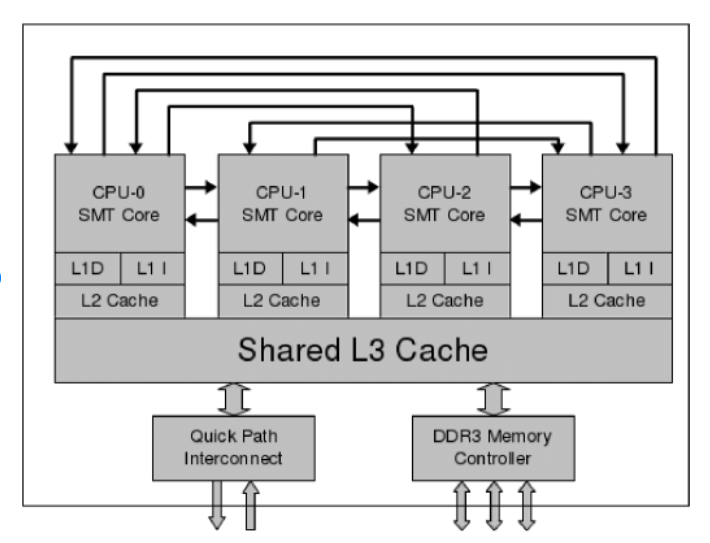

Intel Core i7 Processor Architechture Layout with Simultaneous Multi-threading (SMT)

https://fm.csl.sri.com/LAW09/2011/law2011-paper-bradetich.pdf


**Desafio**

Toda vez que passo um número da memória RAM para o processador fazer uma conta, ele não passa apenas esse número, mas tudo que tiver na memória em torno desse número (bloco) que caiba no cache!

_Exemplo idealizado:_

Caso 1:

    Memória tem os números guardados:
    3 , 7 , 8 , 23 , 54 , 37 , 77 , 40 , 45

    Quero fazer a conta 3 + 40, e a minha memória cache tem 2 blocos de memória, onde em cada um cabem 2 números por vez apenas, como o computador faz a conta?

    1) O processador pede o número 3 para a memória principal e salva o (3, 7) no bloco 1 cache

    2) O processador pede o número 40 para a memória principal e salva o (40, 45) no bloco 2 cache

    3) Os dois blocos levam as informações para os registradores do processador, e dependendo do processador, ele faz a conta de forma vetorial (3,7) + (40, 45) e retorna (43, 52), sendo o valor 43 salvo na memória RAM no endereço solicitado.
    
    4) Agora, se queremos fazer a conta 8 + 45, o processador pede para jogarem fora o bloco 1 do cache e preencher com (8, 23) para fazer a nova conta, usando o bloco 2 já salva no cache.
    
    
Caso 2:

    Memória tem os números guardados (vejam a troca do 7 pelo 8):
    3 , 8 , 7 , 23 , 54 , 37 , 77 , 40 , 45

    Quero fazer a conta 3 + 40, e a minha memória cache tem 2 blocos de memória, onde em cada um cabem 2 números por vez apenas, como o computador faz a conta?

    1) O processador pede o número 3 para a memória principal e salva o (3, 8) no bloco 1 cache

    2) O processador pede o número 40 para a memória principal e salva o (40, 45) no bloco 2 cache

    3) Os dois blocos levam as informações para os registradores do processador, e dependendo do processador, ele faz a conta de forma vetorial (3,8) + (40, 45) e retorna (43, 53), sendo o valor 43 salvo na memória RAM no endereço solicitado.
    
    4) Agora, se queremos fazer a conta 8 + 45, o processador já percebe que as informações relevantes estão em cache, e a conta da operação é aproveitada, devolvendo o 53 na memória (caso o processador seja vetorial). Ou então, para um processador não vetorial, ele já tem as informações para fazer a conta rapidamente, sme precisar acessar a RAM!
    
**Alinhamento de memória**

As contas devem ser preferencialmente feitas na ordem em que os dados estão na memória!!!! Quando a o processador precisa ficar pedidindo novos dados a RAM dizemos que está ocorrendo muito __cache miss__

O caso real é um pouco mais complicado, mas esse conceito ainda é válido. Mais detalhes em https://courses.cs.washington.edu/courses/cse378/09wi/lectures/lec15.pdf


#### Exemplo 3a: como o Python guarda uma matriz na memória? Isso importa?

In [22]:
#Matriz
import numpy as np

n = 20000
c = np.ones((n, 2*n))
linhas, colunas = c.shape
print("Matriz: ", c.shape, "\n", c)
print()

#Soma, para cada coluna, os valores das linhas primeiro
#Código ingênuo
#s = 0
#for j in range(colunas):
#    for i in range(linhas):
#        s = s + c[i,j]
#Código vetorizado
%time s = np.sum(c.sum(axis=0)) #axis=0 significa que vai soma as linhas para cada coluna primeiro!
print("Soma coluna a coluna:", s)
print()

#Soma, para cada linha, os valores das colunas primeiro
#Código ingênuo
#s = 0
#for i in range(linhas):
#    for j in range(colunas):
#        s = s + c[i,j]
#Código vetorizado
%time s = np.sum(c.sum(axis=1)) #axis=1  significa que vai somar nas colunas primeiro
print("Soma linha a linha: ", s)
print()



Matriz:  (20000, 40000) 
 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]

CPU times: user 493 ms, sys: 29 µs, total: 493 ms
Wall time: 492 ms
Soma coluna a coluna: 800000000.0

CPU times: user 413 ms, sys: 10 µs, total: 413 ms
Wall time: 412 ms
Soma linha a linha:  800000000.0



Se ele vai mais rápido somando primeiro as colunas de cada linha, então ele deve armazenar na ordem de linhas!! Isso é chamado de ordem no estilo "C" (padrão em Python) - Row-major order

ordem C: -------------------
         -------------------
         -------------------
         -------------------
         -------------------
         
É possível pedir para o Python armazenar de outro jeito, a ordem no estilo Fortran - Column-major order

ordem Fortran: | | | | | | | |
               | | | | | | | |
               | | | | | | | |               
               | | | | | | | |
               | | | | | | | |               


Mais info em : https://scipy-lectures.org/advanced/advanced_numpy/index.html#cache-effects

In [23]:
#Repetindo o exemplo anterior com ordem Fortran

#Matriz
import numpy as np

n = 10000
c = np.ones((n, 2*n), order='F')
linhas, colunas = c.shape
print("Matriz: ", c.shape, "\n", c)
print()

#Soma, para cada coluna, os valores das linhas primeiro
#Código ingênuo
#s = 0
#for j in range(colunas):
#    for i in range(linhas):
#        s = s + c[i,j]
#Código vetorizado
%time s = np.sum(c.sum(axis=0)) #axis=0 significa que vai soma as linhas para cada coluna primeiro!
print("Soma coluna a coluna:", s)
print()

#Soma, para cada linha, os valores das colunas primeiro
#Código ingênuo
#s = 0
#for i in range(linhas):
#    for j in range(colunas):
#        s = s + c[i,j]
#Código vetorizado
%time s = np.sum(c.sum(axis=1)) #axis=1  significa que vai somar nas colunas primeiro
print("Soma linha a linha: ", s)
print()


Matriz:  (10000, 20000) 
 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]

CPU times: user 99.5 ms, sys: 0 ns, total: 99.5 ms
Wall time: 99.3 ms
Soma coluna a coluna: 200000000.0

CPU times: user 117 ms, sys: 82 µs, total: 118 ms
Wall time: 117 ms
Soma linha a linha:  200000000.0



Note que agora ficou mais rápido lendo coluna a coluna!

#### Exemplo 3b: o conceito de stride e sua relação com cache miss

Strides: número de bytes para pular na memória até chegar no próximo elemento. 

Exemplo: Uma matrix 10x10 com stride de (10,1) significa que:
- Para chegar na próxima linha tem que pular 10 bytes
- Para chegar na próxima coluna, basta olhar o próximo byte

Logo, isso está fortemente conectado ao conceito visto antes de ordenamento.


In [24]:
#Cada inteiro neste caso foi forçado a ocupar 2 bytes na memória (16 bits). 1 byte = 8 bits
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]], dtype=np.int16, order='C')

print("Ordem C: ", x.strides)

x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]], dtype=np.int16, order='F')

print("Ordem F: ", x.strides)

Ordem C:  (6, 2)
Ordem F:  (2, 6)
